In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import csv

# Сгенерировать для тренировки нейросети

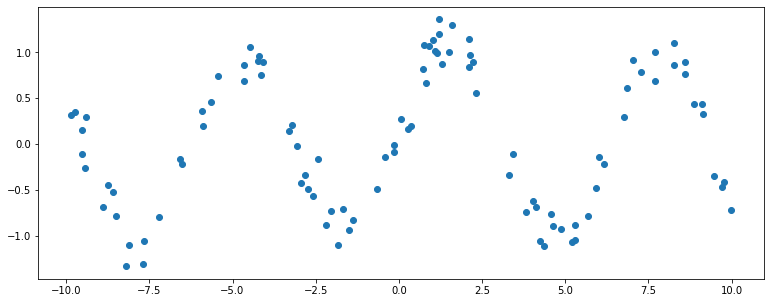

In [21]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)    # функция для генерации -- синус
slag = torch.randn(y_train.shape) / 5.
y_train = y_train + slag
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

x_validation = torch.linspace(-10, 10, 100)    # данные для проверки
y_validation = torch.sin(x_validation.data)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);


# Считать данные из файла

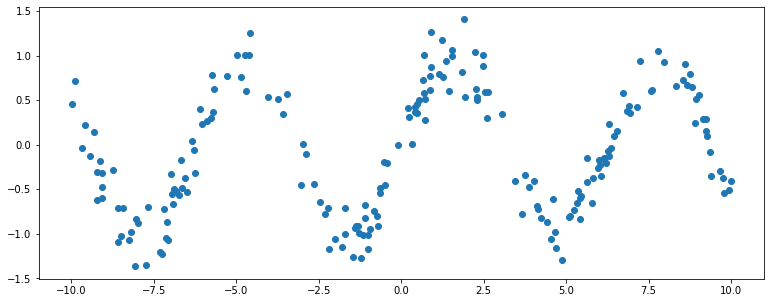

In [23]:
def read_data(filename):
    with open(filename, 'r') as fp:
        reader = csv.reader(fp, delimiter=',', quotechar='"')
        data_read = [row for row in reader]
    

    data_read = [[float(num) for num in nums] for nums in data_read]
    return torch.tensor(data_read)

x_train = read_data('input/x_train_file')
y_train = read_data('input/y_train_file')
x_validation = read_data('input/x_validation_file')
y_validation = read_data('input/y_validation_file')

plt.plot(x_train.numpy(), y_train.numpy(), 'o')

In [12]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(20)

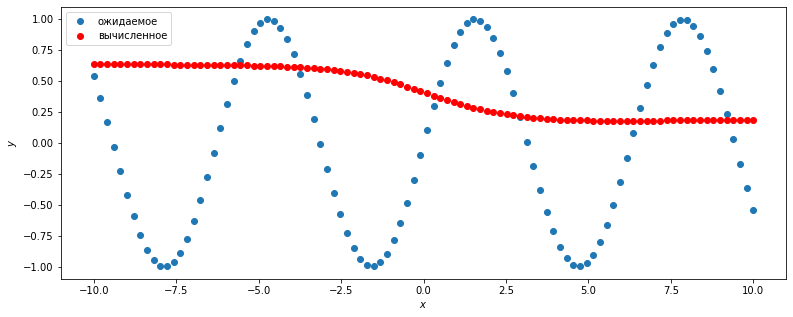

In [13]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='ожидаемое')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='вычисленное');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation) # не обученная нейросеть

In [14]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [16]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

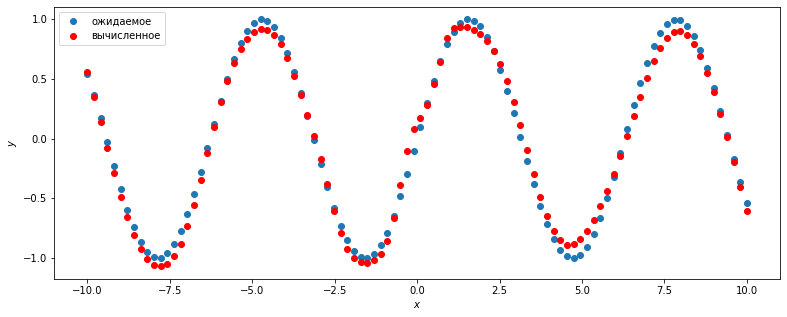

In [24]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()


predict(sine_net, x_validation, y_validation) # обученная нейросеть